In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('survey_purwadhika.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,ID,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,1,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,2,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,3,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,4,27,Bali,S1,Teman,3,DM,1100000,Pria
4,5,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria
5,6,21,Jawa Barat,S1,LinkedIn,2,WD,1500000,Pria
6,7,28,Yogyakarta,S1,Instagram,1,WD,1400000,Pria
7,8,22,Jawa Barat,SMA,Instagram,2,DM,1600000,Pria
8,9,25,Yogyakarta,S1,Teman,3,WD,1600000,Pria
9,10,29,Jawa Tengah,S1,Instagram,2,DM,1600000,Pria


# Data Understanding

In [4]:
# Menampilkan informasi dasar dataset
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    50 non-null     int64 
 1   Umur                  50 non-null     int64 
 2   Asal_Daerah           50 non-null     object
 3   Pendidikan            50 non-null     object
 4   Informasi_Purwadhika  50 non-null     object
 5   Tingkat_Kemampuan     50 non-null     int64 
 6   kelas                 50 non-null     object
 7   Pengeluaran_Bulanan   50 non-null     int64 
 8   gender                50 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


In [5]:
# Menampilkan 5 data pertama
print("Contoh Data:")
df.head()

Contoh Data:


,ID,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,1,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,2,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,3,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,4,27,Bali,S1,Teman,3,DM,1100000,Pria
4,5,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria


In [6]:
# Menampilkan jumlah data unik di setiap kolom
print("Jumlah Kategori Unik per Kolom:")
df.nunique()

Jumlah Kategori Unik per Kolom:


ID                      50
Umur                    17
Asal_Daerah              7
Pendidikan               2
Informasi_Purwadhika     5
Tingkat_Kemampuan        3
kelas                    2
Pengeluaran_Bulanan     12
gender                   2
dtype: int64

In [7]:
# Jumlah Total Peserta
total_peserta = len(df)
print("Jumlah Total Peserta:", total_peserta)

Jumlah Total Peserta: 50


In [8]:
# Tabel Distribusi Sumber Informasi 
tabel_distribusi = df['Informasi_Purwadhika'].value_counts()
tabel_distribusi

Informasi_Purwadhika
Instagram    19
Teman        13
Lainnya      10
LinkedIn      6
Twitter       2
Name: count, dtype: int64

# Data Cleaning

In [9]:
# Mengecek duplikasi
print("Jumlah Duplikasi:")
df.duplicated().sum()

Jumlah Duplikasi:


0

In [10]:
# Tabel Distribusi Kelas
tabel_distribusi = df['kelas'].value_counts()
tabel_distribusi

kelas
DM    30
WD    20
Name: count, dtype: int64

# Uji EDA

In [16]:
# Menghapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=["ID"])
df_cleaned

,Umur,Asal_Daerah,Pendidikan,Informasi_Purwadhika,Tingkat_Kemampuan,kelas,Pengeluaran_Bulanan,gender
0,26,Jawa Tengah,S1,Instagram,2,DM,1200000,Pria
1,23,Yogyakarta,S1,Teman,3,WD,2000000,Pria
2,30,Jawa Tengah,S1,Lainnya,2,DM,1600000,Pria
3,27,Bali,S1,Teman,3,DM,1100000,Pria
4,24,Jawa Tengah,S1,Lainnya,1,WD,1200000,Pria
5,21,Jawa Barat,S1,LinkedIn,2,WD,1500000,Pria
6,28,Yogyakarta,S1,Instagram,1,WD,1400000,Pria
7,22,Jawa Barat,SMA,Instagram,2,DM,1600000,Pria
8,25,Yogyakarta,S1,Teman,3,WD,1600000,Pria
9,29,Jawa Tengah,S1,Instagram,2,DM,1600000,Pria


In [17]:
# Mengecek duplikasi
print("Jumlah Duplikasi:")
df_cleaned.duplicated().sum()

Jumlah Duplikasi:


0

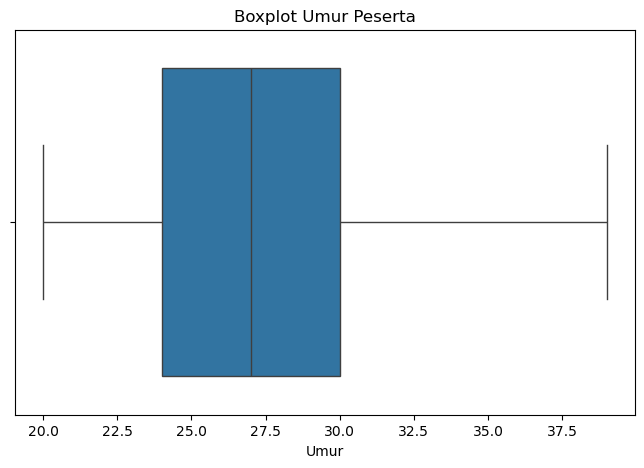

In [11]:
# Memeriksa outlier pada usia peserta menggunakan boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Umur')
plt.title("Boxplot Umur Peserta")
plt.xlabel("Umur")
plt.show()

Text(0, 0.5, 'Frekuensi')

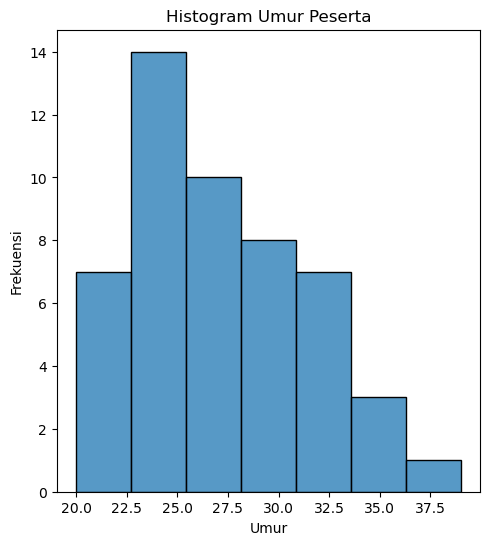

In [12]:
# Visualisasi awal data dalam bentuk histogram dan boxplot untuk usia peserta
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Umur')
plt.title("Histogram Umur Peserta")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")

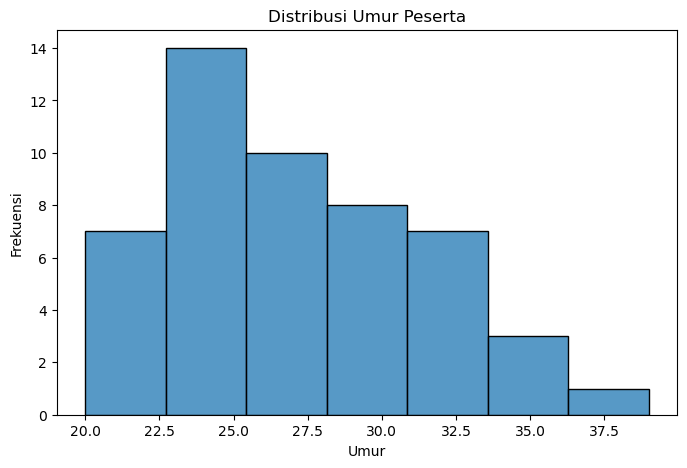

In [13]:
# Distribusi Histogram menggambarkan distribusi usia peserta.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Umur')
plt.title("Distribusi Umur Peserta")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

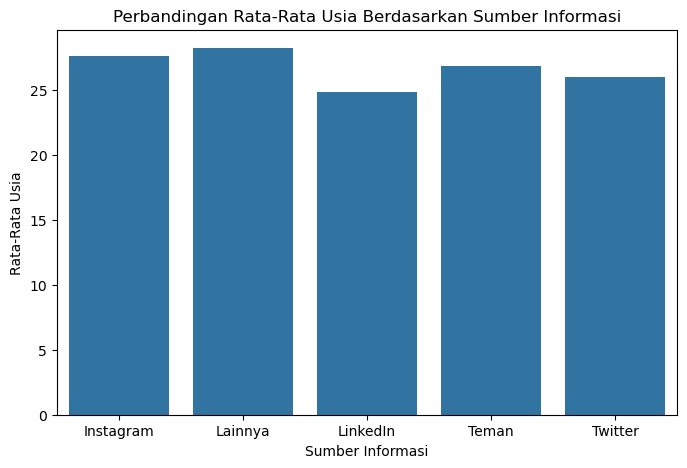

In [14]:
# Menghitung rata-rata usia berdasarkan Sumber Informasi
mean_usia = df.groupby('Informasi_Purwadhika')['Umur'].mean().reset_index()

# Membuat plot dengan data yang sudah dihitung
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_usia, x='Informasi_Purwadhika', y='Umur')
plt.title("Perbandingan Rata-Rata Usia Berdasarkan Sumber Informasi")
plt.xlabel("Sumber Informasi")
plt.ylabel("Rata-Rata Usia")
plt.show()

# Uji Normalitas (Shapiro-Wilk Test): Distribusi Usia Peserta

In [18]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

if 'Umur' in df_cleaned.columns:
    print("Uji Normalitas Usia Peserta:")

print()

# Uji normalitas untuk keseluruhan data usia
stat, p_value = stats.shapiro(df_cleaned['Umur'])
print("P-Value: ", p_value)
print("Shapiro-Wilk Test Statistic: ", stat)

print()
if p_value < 0.05:
    print("Data tidak normal")
else:
    print("Data normal")

Uji Normalitas Usia Peserta:

P-Value:  0.20319035795691776
Shapiro-Wilk Test Statistic:  0.9686158036489997

Data normal


# Uji ANOVA

In [19]:
# Mengambil data Informasi Purwadhika dan Umur
informasi_purwadhika = df_cleaned['Informasi_Purwadhika']
umur = df_cleaned['Umur']

round(df.groupby('Informasi_Purwadhika')['Umur'].mean(),2)

Informasi_Purwadhika
Instagram    27.58
Lainnya      28.20
LinkedIn     24.83
Teman        26.85
Twitter      26.00
Name: Umur, dtype: float64

In [20]:
from scipy.stats import f_oneway

H0 = 'Tidak ada perbedaan rata-rata umur antara Informasi Purwadhika'
Ha = 'Terdapat perbedaan rata-rata umur antara Informasi Purwadhika'

sampel1 = df[df['Informasi_Purwadhika'] == 'Instagram']['Umur']
sampel2 = df[df['Informasi_Purwadhika'] == 'Teman']['Umur']
sampel3 = df[df['Informasi_Purwadhika'] == 'Lainnya']['Umur']
sampel4 = df[df['Informasi_Purwadhika'] == 'LinkedIn']['Umur']
sampel5 = df[df['Informasi_Purwadhika'] == 'Twitter']['Umur']

stat, p_value = f_oneway(sampel1, sampel2, sampel3, sampel4, sampel5)

print("P-Value: ", p_value)
print("F-Statistic: ", stat)

P-Value:  0.6370487647806676
F-Statistic:  0.6395236657778203


In [21]:
if p_value < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Terima H0: {H0}')

Terima H0: Tidak ada perbedaan rata-rata umur antara Informasi Purwadhika


In [22]:
if p_value < 0.05:
    print(f'Ada cukup bukti untuk menolak H0')
else:
    print(f'Tidak ada cukup bukti untuk menolak H0')

Tidak ada cukup bukti untuk menolak H0


# Uji Chi-Square

In [23]:
# Tabel Kontingensi untuk menunjukkan distribusi sumber informasi terhadap kelas peserta
contingency_table = pd.crosstab(df['Informasi_Purwadhika'], df['kelas'])
contingency_table

kelas,DM,WD
Informasi_Purwadhika,,
Instagram,13,6
Lainnya,5,5
LinkedIn,5,1
Teman,6,7
Twitter,1,1


In [24]:
pd.crosstab(df_cleaned['Informasi_Purwadhika'], df_cleaned['kelas'])

kelas,DM,WD
Informasi_Purwadhika,,
Instagram,13,6
Lainnya,5,5
LinkedIn,5,1
Teman,6,7
Twitter,1,1


In [27]:
from scipy.stats import chi2_contingency

H0 = 'Proporsi sumber informasi tidak berbeda antara kelas'
Ha = 'Proporsi sumber informasi berbeda antara kelas'

contingency_table = pd.crosstab(df_cleaned['Informasi_Purwadhika'], df_cleaned['kelas'])
stat, pval, dof, expected = chi2_contingency(contingency_table)

print('P-Value:', pval)
print('Chi Square score:',stat)

P-Value: 0.48383675976113416
Chi Square score: 3.4609761583445784


In [28]:
if pval < 0.05:
    print(f'Tolak H0: {Ha}')
else:
    print(f'Terima H0: {H0}')

Terima H0: Proporsi sumber informasi tidak berbeda antara kelas
